In [2]:
import pandas as pd
df = pd.read_csv("survey.csv")

In [3]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


Initial thoughts:
The comments seems to be mostly NaN values, so I'll get rid of that column.
I don't really care about the time, so I'll drop that too. 
Gender seems to be in a lot of different formats. I wonder what the unique values of each are? 

In [4]:
df = df.drop(columns=["Timestamp","comments"])

Now let's deal with the other columns.

In [5]:
for c in df.columns:
    print("unique values of", c, "are: \n", df[c].unique())

unique values of Age are: 
 [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
unique values of Gender are: 
 ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-f

Thoughts: I could convert a lot of these to booleans, if I felt like it, but I probably shouldn't because of the "I don't know" and "Maybe" answers.
There's a lot of categorical data, in fact, it's mostly categorical data.
The gender seemed to be a "fill in your own" one. I'm wondering if I could get counts on each?
In terms of age, I probably want to get rid of the negative values, unless there's a lot of them, plus that 99999 one. 

I wonder how many total entries I have? I'll figure it out below.

In [6]:
df.size

31475

**that's wrong**, I'll figure out later because I just scrolled back up and it's 1259 rows which is not a whole lot, but it's easy to work with. Now let's deal with the gender thing. Googled a bit and found value_counts() so we'll see if it works.

In [7]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Man                                                 2
Female (trans)                                      2
Cis Male                                            2
Female                                              2
A little about you                                  1
ostensibly male, unsure what that really means      1
p                                                   1
Malr                        

perfect, that does exactly what I want it to do.
I think I'll make a "gender non-conforming" category for anyone that didn't answer strongly in the male or female direction. "Male-ish", and "Female (trans)" will get classified as male and female, respectively, whereas "genderqueer" and "male-leaning androgynous" will be in "gender non-conforming". I'll just drop stuff I can't figure out, like "a little about you" and "p". I wonder what would happen if I excluded gender from the analysis. We'll see later.

Looking at the data and data description again, work_infere looks interesting but I'll have to look closer at it. I should probably figure out what I want my question to be before I look any farther. Then I can do some EDA.

In [8]:
df.work_interfere.describe()

count           995
unique            4
top       Sometimes
freq            465
Name: work_interfere, dtype: object

In [9]:
df.treatment

0       Yes
1        No
2        No
3       Yes
4        No
       ... 
1254    Yes
1255    Yes
1256    Yes
1257     No
1258    Yes
Name: treatment, Length: 1259, dtype: object

In [10]:
df.obs_consequence.isnull().values.any() #False, so no null values in there

False

**Question (Possible)**  
- What factors contribute towards <em> treatment </em> variable? Maybe *family_history*?  
- Employer attitudes towards mental health in the workplace  
    - Maybe compute a score based on some score of the other variables 
- Employees attitudes towards mental health in the workplace
    - Maybe compute a score based on some score of the other variables 
    
**Preliminary Questions**
1. What are the strongest predictors of whether someone got treatment for mental heath (*treatment*)?
2. What is the strongest predictor of an employer's attitude towards mental heath?
    - need to define "employer's attitude towards mental health" 

## Question 1: What are the strongest predictors of whether someone got treatment for mental heath (*treatment*)?  
need to deal with missing values for each columns

In [11]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [12]:
df.replace({'Gender': {'male': 'Male', 'M': 'Male', 'm': 'Male', 'Make': 'Male', 
                       'Man': 'Male', 'Malr':'Male', 'maile': 'Male', 'Mal': 'Male',
                        'maile': 'Male', 'msle':'Male', 'cis male': 'Male', 'Mail': 'Male',
                       'Male (CIS)':'Male', 'Cis male': 'Male', 'Cis Man': 'Male','Cis Male': 'Male',
                       'F': 'Female', 'f':'Female', 'female':'Female', 'Woman': 'Female', 
                       'Female (trans)': 'Female', 'femail':'Female', 'Female (cis)':'Female',
                       'Trans woman': 'Female', 'cis-female/femme': 'Female', 'Cis Female':'Female',
                      'Femake': 'Female', 'Trans-female':'Female', 'woman':'Female', 'Female ': 'Female',
                      'Male ': 'Male',
                      'Genderqueer':'Gender non-conforming', 'Androgyne': 'Gender non-conforming',
                      'Agender': 'Gender non-conforming', 'Nah':'Gender non-conforming', 
                      'Enby':'Gender non-conforming', 'fluid': 'Gender non-conforming', 
                      'something kinda male?': 'Gender non-conforming', 'Neuter':'Gender non-conforming',
                      'queer/she/they':'Gender non-conforming', 'male leaning androgynous':'Gender non-conforming',
                      'Male-ish': 'Gender non-conforming', 'All': 'Gender non-conforming', 
                      'Guy (-ish) ^_^': 'Gender non-conforming', 'queer':'Gender non-conforming',
                      'non-binary': 'Gender non-conforming', 'ostensibly male, unsure what that really means': 'Male'}},
                       inplace=True)

In [13]:
df.Gender.value_counts()

Male                     991
Female                   251
Gender non-conforming     15
p                          1
A little about you         1
Name: Gender, dtype: int64

wanna make distribution of gender variable

In [14]:
#drop the rows that I don't like
mydf = df[df.Gender != 'p']
mydf = mydf[mydf.Gender != 'A little about you']
mydf.Gender.value_counts()

Male                     991
Female                   251
Gender non-conforming     15
Name: Gender, dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

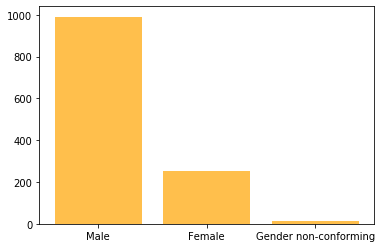

In [16]:
#gender = mydf.groupby('Gender').agg('count') # cool command, but I don't think it's what I need

#get values of gender and counts in different lists
gender = ['Male', 'Female', 'Gender non-conforming']
gen_counts = mydf.Gender.value_counts().tolist()
plt.bar(gender, gen_counts, color='orange',alpha=0.7)

I don't really like that, it's not really giving me what I want

In [17]:
total_gender = 0
for g in gen_counts: total_gender += g;
total_gender
percent_gender = [g/total_gender for g in gen_counts]
percent_gender

[0.7883850437549722, 0.19968178202068418, 0.011933174224343675]

In [18]:
gen_dict = {gender[i]: percent_gender[i] for i in range(len(gender))}
gen_dict

{'Male': 0.7883850437549722,
 'Female': 0.19968178202068418,
 'Gender non-conforming': 0.011933174224343675}

Conclusion: 78% percent male, 20% female, about 1% gender non-conforming

**Start doing PCA for Exploratory Data Analysis**

In [19]:
ydf = mydf["treatment"]
xdf = mydf.drop(columns=["treatment"])

In [20]:
xdf

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,NaN,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,NaN,No,No,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,CA,No,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,NC,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


**Actually let's try _MCA_**

In [22]:
mydf.to_csv('survey_cleaner.csv')

Did an MCA analysis in R - no single variable stood out as explaining anything although geographic location might have something to do with it.

Maybe try a regression?

**More Exploring the Data**  
What does treatment look like?

No handles with labels found to put in legend.


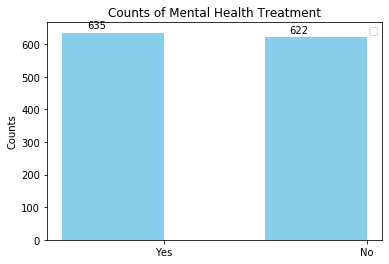

In [33]:
treatment = ['Yes', 'No']
treat_counts = mydf.treatment.value_counts().tolist()
# plt.bar(treatment, treat_counts, color='#42f56f',alpha=0.7)
# for c in treat_counts:
#     axes.text(c)

import numpy as np
    
ind = np.arange(len(treat_counts))  # the x locations for the groups
width = 0.50  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, treat_counts, width,
                color='SkyBlue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts of Mental Health Treatment')
ax.set_xticks(ind)
ax.set_xticklabels(treatment)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")

plt.show()


So roughly equal numbers of people got treatment as did not.  
Age - what does that variable look like?

In [34]:
mydf["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,          11,
                72])

In [57]:
#Clean Age column a bit

# Drop rows for which column Age has bad values
for badage in [99999999999, -1726, 329]: #there's more bad values, but I don't want to drop like all of my data if age doesn't matter
    indexnames = mydf[mydf['Age'] == badage].index
    # Delete these row indexes from dataFrame
    mydf.drop(indexnames , inplace=True)
    
#turn -29 into positive 29 
mydf.replace({'Age': {-29 : 29}}, inplace=True)
mydf["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 11, 72])

Ok, so what's the deal with Age?

In [55]:
mydf.Age.describe()

count    1253.000000
mean       32.057462
std         7.307261
min        11.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [60]:
#I wanna try UpSetR on it
mydf.to_csv('survey_cleaner1.csv')

In [62]:
mydf.Gender.value_counts()

Male                     988
Female                   251
Gender non-conforming     14
Name: Gender, dtype: int64